In [333]:
# https://www.kaggle.com/datasets/datascientistanna/customers-dataset
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [334]:
# getting csv file
df = pd.read_csv('Customers.csv')
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [335]:
# checking NA values
df.isna().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [336]:
# dropping NA values
df.dropna(inplace=True)

In [337]:
# replacing NA values
# df = df.fillna(df.mode().iloc[0])
# df.isna().sum()

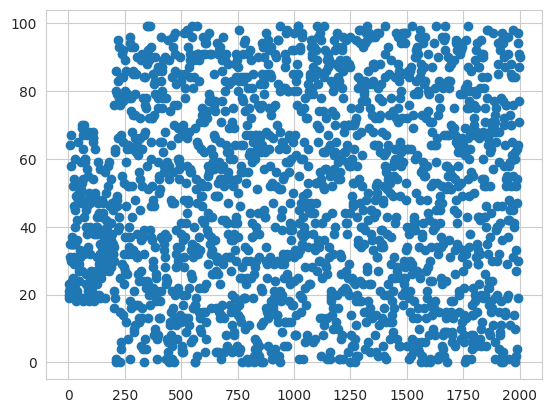

In [338]:
# Scatter Plot
plt.grid(True)
plt.scatter(df['CustomerID'],df['Age'])
plt.show()

(array([135., 735., 619., 476.,   0.]),
 array([     0.,  50000., 100000., 150000., 200000., 250000.]),
 <BarContainer object of 5 artists>)

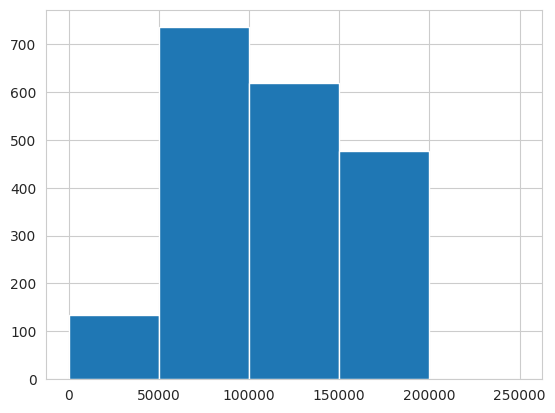

In [339]:
# histogram
plt.hist(df['Annual Income ($)'], bins=[0, 50000, 100000, 150000, 200000, 250000])

<Axes: xlabel='Profession', ylabel='count'>

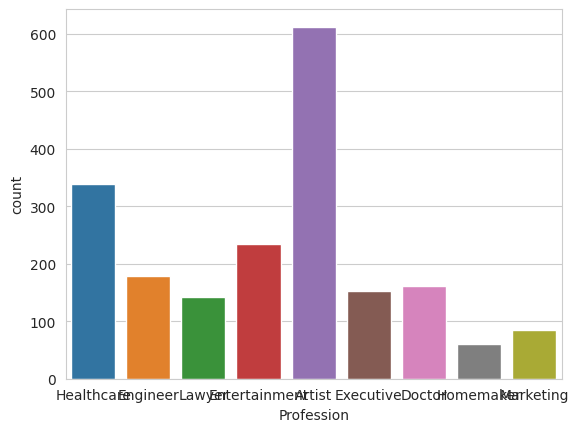

In [340]:
# count plot
sns.countplot(x = 'Profession', data = df)

<Axes: xlabel='Work Experience'>

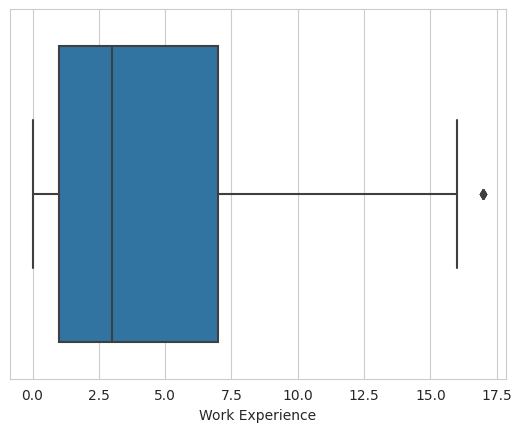

In [341]:
# box plot
sns.boxplot(x = 'Work Experience', data = df)

In [342]:
# Label Encoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Profession']= label_encoder.fit_transform(df['Profession'])

In [343]:
# get object columns
col = df.select_dtypes(include = 'object').columns
# One Hot Encoding
df = pd.get_dummies(df, columns = col)
df = df.drop('CustomerID', axis=1)
df.isna().sum()

Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
Gender_Female             0
Gender_Male               0
dtype: int64

In [344]:
df.describe()

,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Gender_Female,Gender_Male
count,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000
mean,48.894656,110616.009669,51.078880,2.830534,4.092621,3.757252,0.593384,0.406616
std,28.414889,45833.860195,27.977176,2.544969,3.926459,1.968335,0.491327,0.491327
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,25.000000,74350.000000,28.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,48.000000,109759.000000,50.000000,3.000000,3.000000,4.000000,1.000000,0.000000
75%,73.000000,149095.000000,75.000000,5.000000,7.000000,5.000000,1.000000,1.000000
max,99.000000,189974.000000,100.000000,8.000000,17.000000,9.000000,1.000000,1.000000


In [345]:
x = df.iloc[:,1:9]

In [346]:
# Standard Scaler
# from sklearn.preprocessing import StandardScaler 
# scalar = StandardScaler()
# scalar.fit(x)
# x = scalar.transform(x)

In [347]:
# Apply PCA
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 3)
# pca.fit(x)
# x = pca.transform(x)
# x.shape


In [348]:
#Find optimum number of cluster
from sklearn.cluster import KMeans
sse = [] #SUM OF SQUARED ERROR
for k in range(1,10):
    km = KMeans(n_clusters=k, random_state=42, init='k-means++')
    km.fit(x)
    sse.append(km.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

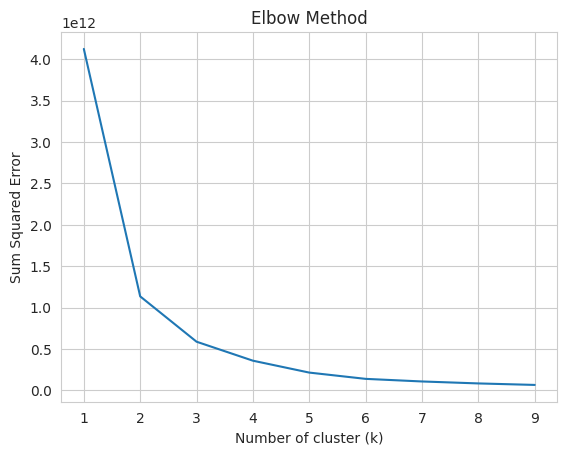

In [349]:
# Elbow Graph
sns.set_style("whitegrid")
g=sns.lineplot(x=range(1, 10), y=sse)
  
g.set(xlabel ="Number of cluster (k)", 
      ylabel = "Sum Squared Error", 
      title ='Elbow Method')
  
plt.show()

In [350]:
# Applying kmeans++ k = 3
kmeans = KMeans(n_clusters = 2, random_state = 42, init='k-means++')
kmeans.fit(x)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [351]:
# prediction
y_pred = kmeans.fit_predict(x)
y_pred

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, ..., 1, 0, 1], dtype=int32)

In [352]:
# # Dunn Index
# # We store the K-means results in a dataframe
# pred = pd.DataFrame(y_pred)
# pred.columns = ['Types']
 
# # we merge this dataframe with df
# prediction = pd.concat([df, pred], axis = 1)
 
# # We store the clusters
# clus0 = prediction.loc[prediction.Types == 0]
# clus1 = prediction.loc[prediction.Types == 1]
# clus2 = prediction.loc[prediction.Types == 2]
# cluster_list = [clus0.values, clus1.values, clus2.values]
 
# print(base.dunn(cluster_list))

In [353]:
# Silhouetee Score
from sklearn import metrics
score = metrics.silhouette_score(df, kmeans.labels_, metric='manhattan')
print(score)

0.6182495636677954
